## Default of Credit Card Clients Dataset


Дані з каглу : https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset


недавно мала тестове  на побудову моделі бінарної класифікації - там було 554 фічі:) знайшла на каглі схожу задачу, тому пророблю з даними каглу те ж саме. 

Ми будемо намагатись передбачити default.payment.next.month, як і у статті вище, але за допомогою  інших бібліотек:). 

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [2]:
# імпорт
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [3]:
credit_risk= pd.read_csv("UCI_credit_card.csv")
credit_risk.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Data preparation and Pre-processing

In [4]:
# скопіюємо датасет, і будемо працювати з копією
df= credit_risk.copy()
pd.set_option('display.max_columns', None)
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [5]:
# подивимось на тип даних та к-сть значень у кожній колонці
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
# схоже, пропущених немає, ще раз перевіримо 
count_na = df.isna().sum()
count_na

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

пропущених немає, це вже добре. 
тепер подивимось колонки, одразу можна сказати, що :
1) ID - наврядчи нам поможе з моделлю
2) EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) - можна 5 і 6 замінити чимось одним, оскільки в обох значення n/a.


In [7]:
# видалення колонки ID
df.drop(["ID"], axis=1, inplace= True)

In [8]:
# подивимось, скільки значень освіти 
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [9]:
# міняємо 0, 5 та 6 на 1 - на школу:)  і дивимось, яка вийде розбивка
df['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace=True)
df.EDUCATION.value_counts()

2    14030
1    10930
3     4917
4      123
Name: EDUCATION, dtype: int64

тепер колонка "MARRIAGE" - є якийсь 0, який не розшифрований в описі датасету - можемо його прирівняти до 3 - "others"

In [10]:
# Marital status (1=married, 2=single, 3=others)
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [11]:
df['MARRIAGE'].replace({0:3,1:1,2:2,3:3}, inplace=True)
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [12]:
# колонка "PAY_0 to PAY_6"
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

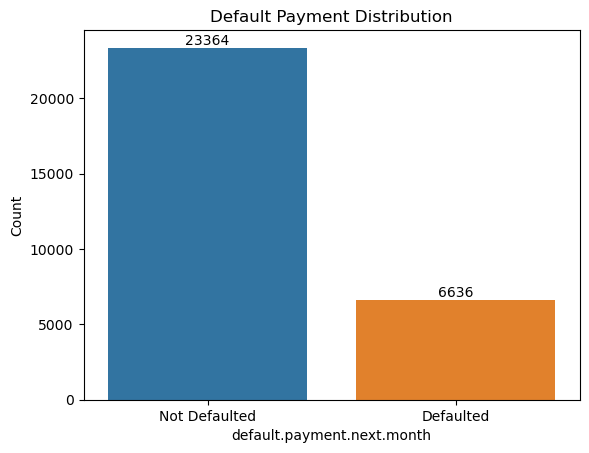

In [13]:
# подивимось на цільову колонку "default.payment.next.month" та роподіл класів
sns.countplot(x="default.payment.next.month", data=df)
plt.xlabel("default.payment.next.month")
plt.ylabel("Count")
plt.title("Default Payment Distribution")
plt.xticks([0, 1], ["Not Defaulted", "Defaulted"])

# заодно відобразимо к-сть кожного класу
for i, v in enumerate(df["default.payment.next.month"].value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom')

дефолтних значень значно менше ніж не дефолтних... маємо справу незбалансованих класів у цільовій колонці, поки що маємо на увазі. 

Text(0.5, 1.0, 'Age distribution')

<Figure size 600x600 with 0 Axes>

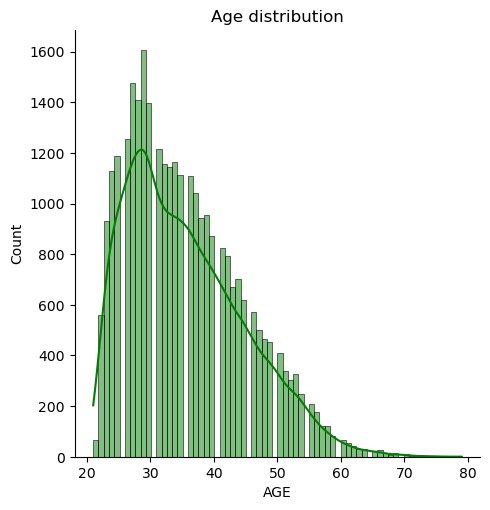

In [14]:
# візуалізуємо розподіл по віку
plt.figure(figsize=(6,6))
sns.displot(df['AGE'], kde=True, color='green')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age distribution")

Text(0.5, 1.0, 'Default Payment by Gender')

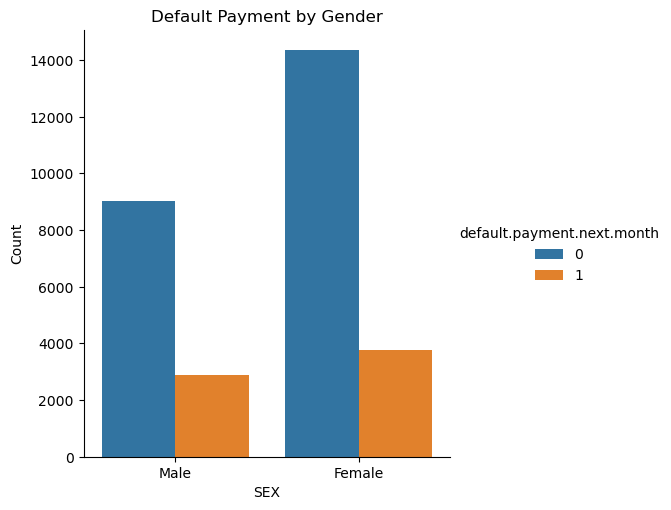

In [15]:
# Побудова графіку розподілу дефолтних платежів в залежності від інших змінних - статі 
sns.catplot(x="SEX", hue="default.payment.next.month", data=df, kind="count")
plt.xticks([0,1], labels=["Male", "Female"])
plt.xlabel("SEX")
plt.ylabel("Count")
plt.title("Default Payment by Gender")

Text(0.5, 1.0, 'EDUCATION distribution')

<Figure size 1500x600 with 0 Axes>

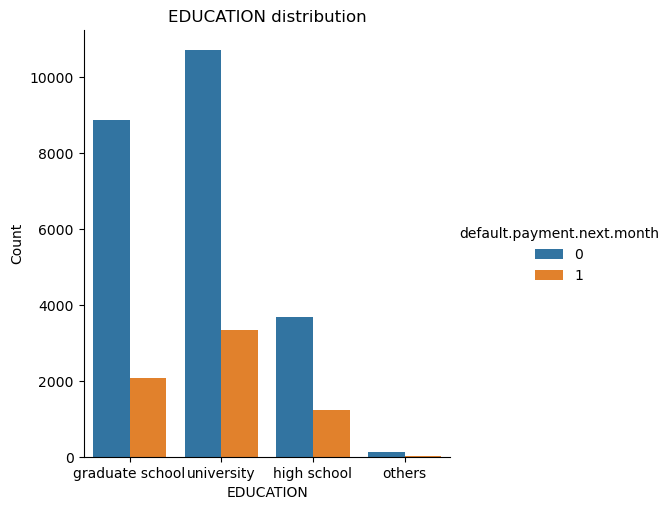

In [16]:
# тепер розподіл за освітою
# (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
plt.figure(figsize=(15,6))
sns.catplot(x="EDUCATION", hue="default.payment.next.month", data=df, kind="count")
plt.xticks([0,1,2,3], labels=["graduate school", "university", 'high school', 'others'])
plt.xlabel("EDUCATION")
plt.ylabel("Count")
plt.title("EDUCATION distribution")

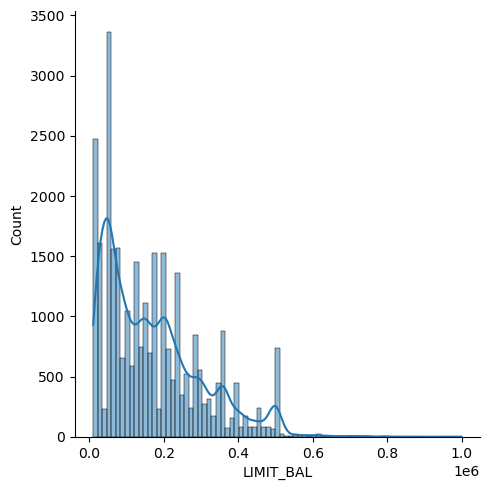

In [17]:
# With column 'limit_bal'
sns.displot(df.LIMIT_BAL, kde=True)

/var/folders/r7/mpd7z_ms31j9b6hwvjlnymsh0000gn/T/ipykernel_2971/2734752514.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


Text(0, 0.5, 'BILL_AMT6')

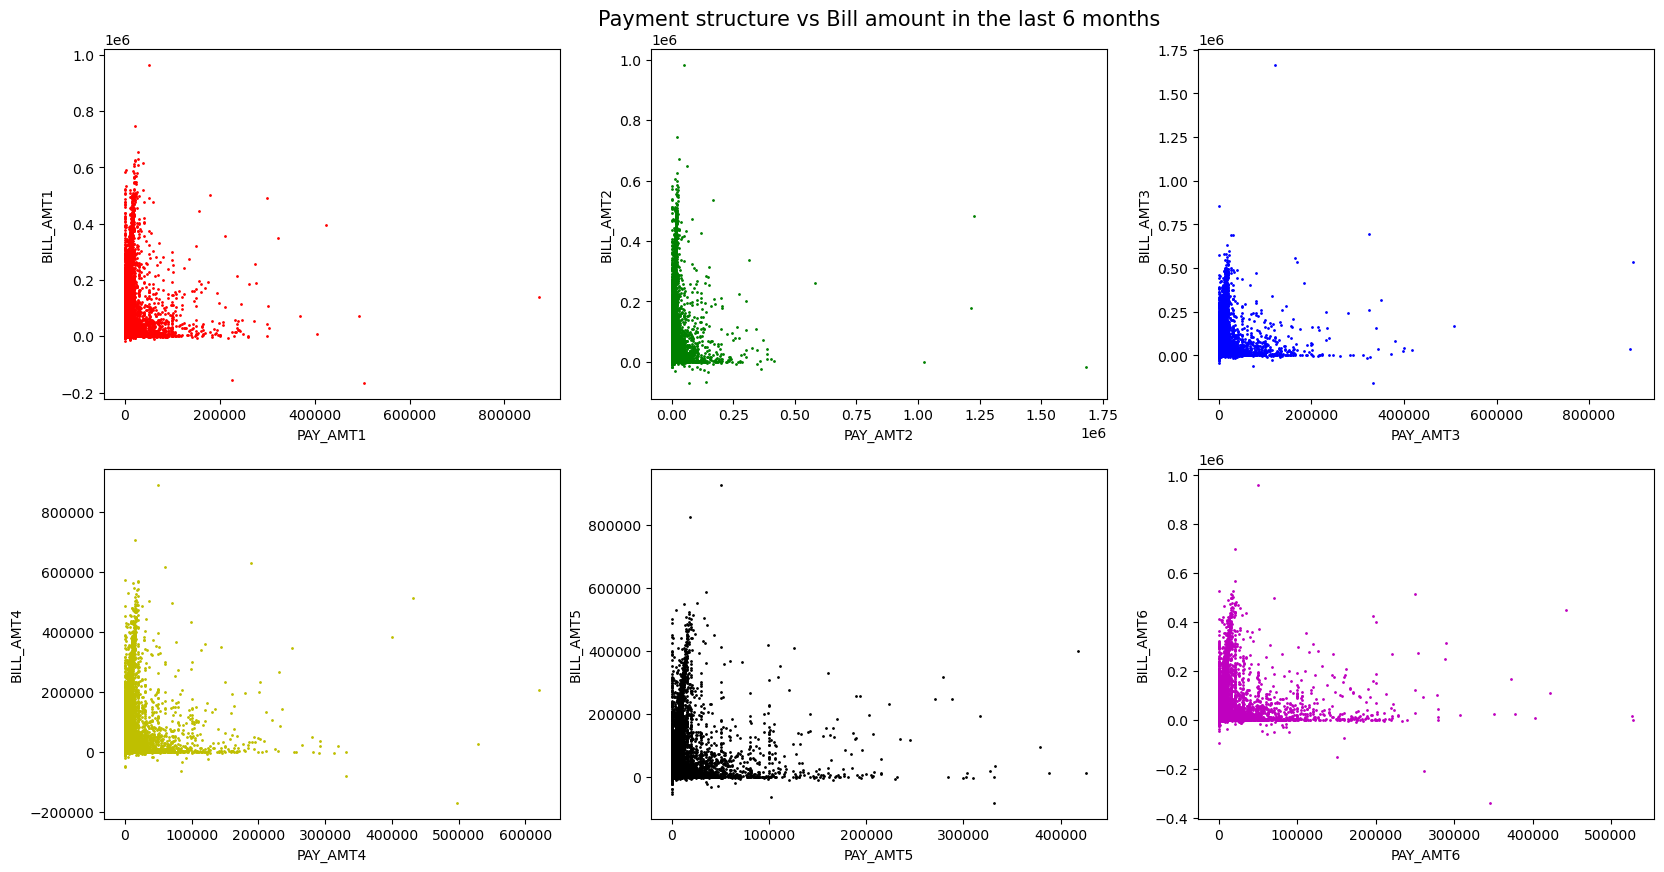

In [18]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


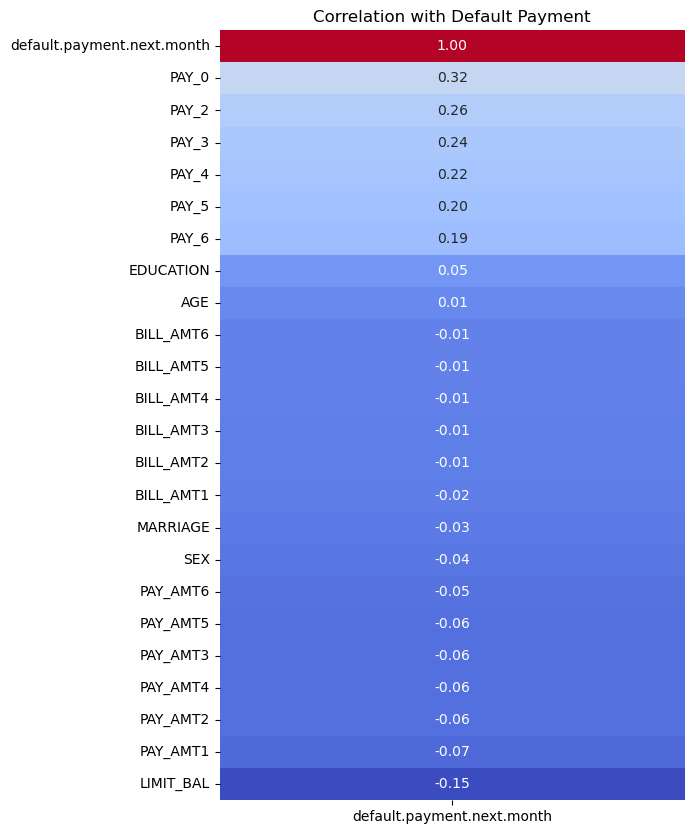

In [19]:
# створимо матриці кореляції
corr_matrix = df.corr()
corr_target = corr_matrix['default.payment.next.month'].sort_values(ascending=False)

# відобразимо матриці кореляції одним стовпчиком
plt.figure(figsize=(6, 10))
sns.heatmap(corr_target.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title("Correlation with Default Payment")
plt.show()

кореляції нема між змінними, щоб якусь обрати... 

# розподіл на x та y

In [20]:
# незалежна
X = df.drop(['default.payment.next.month'], axis=1)
# залежна
y = df['default.payment.next.month']
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


# Scalling the features

In [21]:
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [22]:
# Розділення на тренувальну та тестову вибірку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Розділення тестової вибірки на тестову та валідаційну
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

# Вивід розмірностей тренувальної, тестової та валідаційної вибірок
print("Розмірність тренувальної вибірки:", X_train.shape)
print("Розмірність тестової вибірки:", X_test.shape)
print("Розмірність валідаційної вибірки:", X_val.shape)

Розмірність тренувальної вибірки: (15000, 23)
Розмірність тестової вибірки: (7500, 23)
Розмірність валідаційної вибірки: (7500, 23)


In [23]:
y_train_counts = y_train.value_counts()
y_test_counts = y_test.value_counts()
y_val_counts = y_val.value_counts()

print("Розподіл тренувальної вибірки: ")
print(y_train_counts)
print("Розподіл валідаційної вибірки:")
print(y_val_counts)
print("Розподіл тестової вибірки:")
print(y_test_counts)

Розподіл тренувальної вибірки: 
0    11682
1     3318
Name: default.payment.next.month, dtype: int64
Розподіл валідаційної вибірки:
0    5841
1    1659
Name: default.payment.next.month, dtype: int64
Розподіл тестової вибірки:
0    5841
1    1659
Name: default.payment.next.month, dtype: int64


співвідношення класів цільової змінної у розподілених вибірках зберегли.  так як у нас незбалансовані класи, спробуємо натренувати decision tree.

## Balancing the train data

In [24]:
# так як у нас незбалансовані класи  у цільовій змінній - застосуємо смот - створимо штучні приклади класу, якого значно менше
# покажемо розподіл класів перед смот
print("Before oversampling: ",Counter(y_train))

# ініціалізуємо смот
SMOTE= SMOTE()


X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# покажемо розподіл класів після смот 
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 11682, 1: 3318})
After oversampling:  Counter({1: 11682, 0: 11682})


# Вибір моделі

будемо порівнювати 5 між собою  моделей.

In [25]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [28]:
# Support Vector Machine Classifier
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [29]:
y_train_pred_logreg = logreg.predict(X_train)
y_val_pred_logreg = logreg.predict(X_val)

y_train_pred_rfc = rfc.predict(X_train)
y_val_pred_rfc = rfc.predict(X_val)

y_train_pred_xgb = xgb.predict(X_train)
y_val_pred_xgb = xgb.predict(X_val)

y_train_pred_svm = svm.predict(X_train)
y_val_pred_svm = svm.predict(X_val)

# Оцінка результатів Logistic Regression
print("Logistic Regression:")
train_accuracy_logreg = accuracy_score(y_train, y_train_pred_logreg)
val_accuracy_logreg = accuracy_score(y_val, y_val_pred_logreg)
train_rmse_logreg = mean_squared_error(y_train, y_train_pred_logreg, squared=False)
val_rmse_logreg = mean_squared_error(y_val, y_val_pred_logreg, squared=False)
train_precision_logreg = precision_score(y_train, y_train_pred_logreg)
val_precision_logreg = precision_score(y_val, y_val_pred_logreg)
train_recall_logreg = recall_score(y_train, y_train_pred_logreg)
val_recall_logreg = recall_score(y_val, y_val_pred_logreg)
train_f1_logreg = f1_score(y_train, y_train_pred_logreg)
val_f1_logreg = f1_score(y_val, y_val_pred_logreg)


print("Accuracy на навчальних даних:", train_accuracy_logreg)
print("Accuracy на валідаційних даних:", val_accuracy_logreg)
print("RMSE на навчальних даних:", train_rmse_logreg)
print("RMSE на валідаційних даних:", val_rmse_logreg)
print("Precision на навчальних даних:", train_precision_logreg)
print("Precision на валідаційних даних:", val_precision_logreg)
print("Recall на навчальних даних:", train_recall_logreg)
print("Recall на валідаційних даних:", val_recall_logreg)
print("F1-score на навчальних даних:", train_f1_logreg)
print("F1-score на валідаційних даних:", val_f1_logreg)
print()

# Оцінка результатів Random Forest Classifier
print("Random Forest Classifier:")
train_accuracy_rfc = accuracy_score(y_train, y_train_pred_rfc)
val_accuracy_rfc = accuracy_score(y_val, y_val_pred_rfc)
train_rmse_rfc = mean_squared_error(y_train, y_train_pred_rfc, squared=False)
val_rmse_rfc = mean_squared_error(y_val, y_val_pred_rfc, squared=False)
train_precision_rfc = precision_score(y_train, y_train_pred_rfc)
val_precision_rfc = precision_score(y_val, y_val_pred_rfc)
train_recall_rfc = recall_score(y_train, y_train_pred_rfc)
val_recall_rfc = recall_score(y_val, y_val_pred_rfc)
train_f1_rfc = f1_score(y_train, y_train_pred_rfc)
val_f1_rfc = f1_score(y_val, y_val_pred_rfc)


print("Accuracy на навчальних даних:", train_accuracy_rfc)
print("Accuracy на валідаційних даних:", val_accuracy_rfc)
print("RMSE на навчальних даних:", train_rmse_rfc)
print("RMSE на валідаційних даних:", val_rmse_rfc)
print("Precision на навчальних даних:", train_precision_rfc)
print("Precision на валідаційних даних:", val_precision_rfc)
print("Recall на навчальних даних:", train_recall_rfc)
print("Recall на валідаційних даних:", val_recall_rfc)
print("F1-score на навчальних даних:", train_f1_rfc)
print("F1-score на валідаційних даних:", val_f1_rfc)
print()

# Оцінка результатів XGBoost Classifier
print("XGBoost Classifier:")
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
train_rmse_xgb = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
val_rmse_xgb = mean_squared_error(y_val, y_val_pred_xgb, squared=False)
train_precision_xgb = precision_score(y_train, y_train_pred_xgb)
val_precision_xgb = precision_score(y_val, y_val_pred_xgb)
train_recall_xgb = recall_score(y_train, y_train_pred_xgb)
val_recall_xgb = recall_score(y_val, y_val_pred_xgb)
train_f1_xgb = f1_score(y_train, y_train_pred_xgb)
val_f1_xgb = f1_score(y_val, y_val_pred_xgb)


print("Accuracy на навчальних даних:", train_accuracy_xgb)
print("Accuracy на валідаційних даних:", val_accuracy_xgb)
print("RMSE на навчальних даних:", train_rmse_xgb)
print("RMSE на валідаційних даних:", val_rmse_xgb)
print("Precision на навчальних даних:", train_precision_xgb)
print("Precision на валідаційних даних:", val_precision_xgb)
print("Recall на навчальних даних:", train_recall_xgb)
print("Recall на валідаційних даних:", val_recall_xgb)
print("F1-score на навчальних даних:", train_f1_xgb)
print("F1-score на валідаційних даних:", val_f1_xgb)
print()

# Оцінка результатів Support Vector Machine Classifier
print("Support Vector Machine Classifier:")
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
train_rmse_svm = mean_squared_error(y_train, y_train_pred_svm, squared=False)
val_rmse_svm = mean_squared_error(y_val, y_val_pred_svm, squared=False)
train_precision_svm = precision_score(y_train, y_train_pred_svm)
val_precision_svm = precision_score(y_val, y_val_pred_svm)
train_recall_svm = recall_score(y_train, y_train_pred_svm)
val_recall_svm = recall_score(y_val, y_val_pred_svm)
train_f1_svm = f1_score(y_train, y_train_pred_svm)
val_f1_svm = f1_score(y_val, y_val_pred_svm)


print("Accuracy на навчальних даних:", train_accuracy_svm)
print("Accuracy на валідаційних даних:", val_accuracy_svm)
print("RMSE на навчальних даних:", train_rmse_svm)
print("RMSE на валідаційних даних:", val_rmse_svm)
print("Precision на навчальних даних:", train_precision_svm)
print("Precision на валідаційних даних:", val_precision_svm)
print("Recall на навчальних даних:", train_recall_svm)
print("Recall на валідаційних даних:", val_recall_svm)
print("F1-score на навчальних даних:", train_f1_svm)
print("F1-score на валідаційних даних:", val_f1_svm)
print()


Logistic Regression:
Accuracy на навчальних даних: 0.6804485533299093
Accuracy на валідаційних даних: 0.6852
RMSE на навчальних даних: 0.5652888170396534
RMSE на валідаційних даних: 0.5610704055642215
Precision на навчальних даних: 0.6889566152742919
Precision на валідаційних даних: 0.37692847124824685
Recall на навчальних даних: 0.6579352850539292
Recall на валідаційних даних: 0.6479807112718505
F1-score на навчальних даних: 0.6730887117961293
F1-score на валідаційних даних: 0.4766127244513412

Random Forest Classifier:
Accuracy на навчальних даних: 0.9997003937681904
Accuracy на валідаційних даних: 0.7972
RMSE на навчальних даних: 0.017309137234698374
RMSE на валідаційних даних: 0.4503332099679081
Precision на навчальних даних: 0.9995721009841677
Precision на валідаційних даних: 0.5490753911806543
Recall на навчальних даних: 0.9998287964389659
Recall на валідаційних даних: 0.4653405666063894
F1-score на навчальних даних: 0.9997004322334916
F1-score на валідаційних даних: 0.5037520391

з цього переліку, по Accuracy на валідаційних даних найкраще виглядають моделі Random Forest Classifier: та XGBoost Classifier:. але так як ми мали незбалансовані класи, будемо покращувати F1-score. спробуємо оптимізувати обидві моделі за цим параметром і порівняти.

# Пошук найкращих параметрів RandomForestClassifier 

In [30]:
# Створення екземпляра моделі Random Forest
forest_model = RandomForestClassifier()

# Визначення сітки параметрів для підбору
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False],
}


random_search=RandomizedSearchCV(forest_model,param_distributions=param_grid,n_iter=5,scoring='f1_macro',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='f1_macro', verbose=3)

In [31]:
random_search.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=300)

In [32]:
# Виведення найкращих параметрів
print("Найкращі параметри:",random_search.best_params_)

Найкращі параметри: {'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 15, 'bootstrap': True}


In [33]:
# Побудова та навчання моделі Random Forest Classifier з найкращими параметрами
rfc_model = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=200,bootstrap=True)
rfc_model.fit(X_train, y_train)

# Отримання передбачень для валідаційних даних
y_val_pred_rfc = rfc_model.predict(X_val)

# Оцінка результатів Random Forest Classifier на валідаційних даних
val_accuracy_rfc = accuracy_score(y_val, y_val_pred_rfc)
val_rmse_rfc = mean_squared_error(y_val, y_val_pred_rfc, squared=False)
val_precision_rfc = precision_score(y_val, y_val_pred_rfc)
val_recall_rfc = recall_score(y_val, y_val_pred_rfc)
val_f1_rfc = f1_score(y_val, y_val_pred_rfc)

# Виведення оцінок на валідаційних даних
print("Random Forest Classifier:")
print("Accuracy на валідаційних даних:", val_accuracy_rfc)
print("RMSE на валідаційних даних:", val_rmse_rfc)
print("Precision на валідаційних даних:", val_precision_rfc)
print("Recall на валідаційних даних:", val_recall_rfc)
print("F1-score на валідаційних даних:", val_f1_rfc)

Random Forest Classifier:
Accuracy на валідаційних даних: 0.7964
RMSE на валідаційних даних: 0.45122056690713913
Precision на валідаційних даних: 0.5398069963811821
Recall на валідаційних даних: 0.5394816154309825
F1-score на валідаційних даних: 0.5396442568586072


F1-score трохи покращився - з 0.50212 на валідаційних даних у першій моделі - став 0.5440 за результатами моделі з "найкращими параметрами", покращився Recall та Accuracy.  вже непогано, так само проробимо з XGBClassifier - і так само виведемо результати

# Пошук найкращих параметрів XGBClassifier

In [34]:
# Визначимо набір параметрів для перебору
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [35]:
#  задамо для  покращення ф1-скор
random_search=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='f1',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='f1', verbose=3)

In [36]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [37]:
# Виведення найкращих параметрів
print("Найкращі параметри:",random_search.best_params_)

Найкращі параметри: {'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.4}


In [38]:
xgb_model = XGBClassifier()

In [39]:
# натренуємо нову модель з найкращими параметрами та виведемо оцінку 
xgb_model_best= XGBClassifier(objective='binary:logistic',
                          gamma=0.4,
                          learning_rate=0.05,
                          max_depth=15,
                          min_child_weight=5,
                          colsample_bytree=0.30,
                          use_label_encoder=False)

xgb_model_best.fit(X_train, y_train)

/Users/vitamajstrenko/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [40]:
# Зробимо прогнози на навчальних та валідаційних даних
y_train_pred_xgb = xgb_model_best.predict(X_train)
y_val_pred_xgb = xgb_model_best.predict(X_val)

train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
train_rmse_xgb = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
val_rmse_xgb = mean_squared_error(y_val, y_val_pred_xgb, squared=False)
train_precision_xgb = precision_score(y_train, y_train_pred_xgb)
val_precision_xgb = precision_score(y_val, y_val_pred_xgb)
train_recall_xgb = recall_score(y_train, y_train_pred_xgb)
val_recall_xgb = recall_score(y_val, y_val_pred_xgb)
train_f1_xgb = f1_score(y_train, y_train_pred_xgb)
val_f1_xgb = f1_score(y_val, y_val_pred_xgb)


print("Accuracy на навчальних даних:", train_accuracy_xgb)
print("Accuracy на валідаційних даних:", val_accuracy_xgb)
print("RMSE на навчальних даних:", train_rmse_xgb)
print("RMSE на валідаційних даних:", val_rmse_xgb)
print("Precision на навчальних даних:", train_precision_xgb)
print("Precision на валідаційних даних:", val_precision_xgb)
print("Recall на навчальних даних:", train_recall_xgb)
print("Recall на валідаційних даних:", val_recall_xgb)
print("F1-score на навчальних даних:", train_f1_xgb)
print("F1-score на валідаційних даних:", val_f1_xgb)
print()



Accuracy на навчальних даних: 0.9416623865776408
Accuracy на валідаційних даних: 0.8098666666666666
RMSE на навчальних даних: 0.24153180623338033
RMSE на валідаційних даних: 0.43604281135380885
Precision на навчальних даних: 0.9725249564978478
Precision на валідаційних даних: 0.6019247594050744
Recall на навчальних даних: 0.9090053073103921
Recall на валідаційних даних: 0.41470765521398434
F1-score на навчальних даних: 0.9396929339409761
F1-score на валідаційних даних: 0.49107780157030695



результати F1-score стали тільки 0.49 з 0.47 на початку.. та і accuracy не значно покращилась, тому оберу RandomForestClassifier  - ця модель повніша та точніша.
Ще раз виведемо всі важливі метрики на валідаційних даних. 

In [41]:
print("The accuracy of the model is:", accuracy_score(y_val, y_val_pred_rfc))
print(classification_report(y_val, y_val_pred_rfc)) 

The accuracy of the model is: 0.7964
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5841
           1       0.54      0.54      0.54      1659

    accuracy                           0.80      7500
   macro avg       0.70      0.70      0.70      7500
weighted avg       0.80      0.80      0.80      7500



In [42]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc_model,X,y,cv=10)

In [43]:
score

array([0.80666667, 0.81      , 0.81166667, 0.809     , 0.81833333,
       0.82633333, 0.83733333, 0.834     , 0.82633333, 0.825     ])

In [44]:
score.mean()

0.8204666666666667

In [45]:
# Зробимо прогнози на тестових
y_test_pred_rfc = rfc_model.predict(X_test)
# Отримання передбачень для валідаційних даних
y_val_pred_rfc = rfc_model.predict(X_val)


test_accuracy_rfc = accuracy_score(y_test, y_test_pred_rfc)
val_accuracy_rfc = accuracy_score(y_val, y_val_pred_rfc)
test_rmse_rfc = mean_squared_error(y_test, y_test_pred_rfc, squared=False)
val_rmse_rfc = mean_squared_error(y_val, y_val_pred_rfc, squared=False)
test_precision_rfc = precision_score(y_test, y_test_pred_rfc)
val_precision_rfc = precision_score(y_val, y_val_pred_rfc)
test_recall_rfc = recall_score(y_test, y_test_pred_rfc)
val_recall_rfc = recall_score(y_val, y_val_pred_rfc)
test_f1_rfc = f1_score(y_test, y_test_pred_rfc)
val_f1_rfc = f1_score(y_val, y_val_pred_rfc)



# Виведення оцінок на валідаційних даних

print("Accuracy на тестових даних:", test_accuracy_rfc)
print("Accuracy на валідаційних даних:", val_accuracy_rfc)
print("RMSE на тестових даних:", test_rmse_rfc)
print("RMSE на валідаційних даних:", val_rmse_rfc)
print("Precision на тестових даних:", test_precision_rfc)
print("Precision на валідаційних даних:", val_precision_rfc)
print("Recall на тестових даних:", test_recall_rfc)
print("Recall на валідаційних даних:", val_recall_rfc)
print("F1-score на тестових даних:", test_f1_rfc)
print("F1-score на валідаційних даних:", val_f1_rfc)
print()



Accuracy на тестових даних: 0.7918666666666667
Accuracy на валідаційних даних: 0.7964
RMSE на тестових даних: 0.4562163229580166
RMSE на валідаційних даних: 0.45122056690713913
Precision на тестових даних: 0.5306633291614519
Precision на валідаційних даних: 0.5398069963811821
Recall на тестових даних: 0.5111512959614225
Recall на валідаційних даних: 0.5394816154309825
F1-score на тестових даних: 0.5207245931839115
F1-score на валідаційних даних: 0.5396442568586072



Отже, кінцева обрана модель - RandomForestClassifier.

Precision вказує на відсоток правильно класифікованих позитивних прикладів серед усіх прикладів, які модель визначила як позитивні. Значення Precision для тестових і валідаційних даних становлять відповідно 0.54 і 0.55, що показує, що модель має прийнятну точність в класифікації позитивних прикладів.

Recall вказує на відсоток правильно класифікованих позитивних прикладів серед усіх фактично позитивних прикладів. Значення Recall для тестових і валідаційних даних становлять відповідно 0.50 і 0.54, що означає, що модель має помірну здатність правильно визначати позитивні приклади.

F1-score є гармонічним середнім між Precision і Recall і дає більш повну картину ефективності моделі. Значення F1-score для тестових і валідаційних даних становлять відповідно 0.52 і 0.54, що свідчить про помірний баланс між точністю і повнотою моделі. норм. 

In [52]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Определяем функцию для визуализации границ решений
def plot_decision_regions(X_test, y_test_pred_rfc, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Определяем границы графика
    x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Рисуем точки данных
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl) 

# Визуализируем результаты
plot_decision_regions(X_test[:, :23], y_test, classifier=rfc_model)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='lower left')
plt.title('Decision Regions')
plt.show()

ValueError: X has 2 features, but RandomForestClassifier is expecting 23 features as input.